In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline


def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x,vy,'b',label="Validation Loss")
  ax.plot(x,ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()
  plt.show()


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
print("Number of training examples:", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples:", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples: 60000 and each image is of shape (28, 28)
Number of training examples: 10000 and each image is of shape (28, 28)


In [0]:
#coverting images from 28*28 to 784*1
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [6]:
print("Number of training examples:", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples:", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples: 60000 and each image is of shape (784)
Number of training examples: 10000 and each image is of shape (784)


In [7]:
print(X_train[0].shape)
print(X_train[0])

(784,)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0

In [0]:
#normalising pixels
X_train = X_train/255
X_test = X_test/255

In [9]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
#Converting y into categorical data
print("Class label of first image is:",y_train[0])

Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test,10)

print("Class label as categorical output:", Y_train[0])


Class label of first image is: 5
Class label as categorical output: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**SOFTMAX CLASSIFIER**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [0]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128
nb_epoch = 20

In [13]:
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.6738 - acc: 0.8350 - val_loss: 0.3836 - val_acc: 0.9014
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.3612 - acc: 0.9029 - val_loss: 0.3226 - val_acc: 0.9129
Epoch 3/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.3200 - acc: 0.9123 - val_loss: 0.2967 - val_acc: 0.9180
Epoch 4/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2998 - acc: 0.9170 - val_loss: 0.2853 - val_acc: 0.9210
Epoch 5/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2879 - acc: 0.9200 - val_loss: 0.2801 - val_acc: 0.9219
Epoch 6/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.2799 - acc: 0.9223 - val_loss: 0.2743 - val_acc: 0.9239
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 0

Test score: 0.2624689169824123
Test accuracy: 0.9273


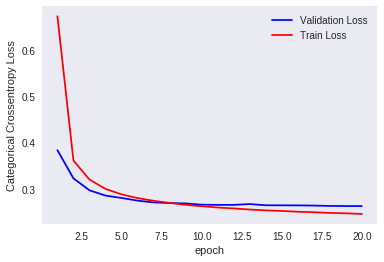

In [16]:
score = model.evaluate(X_test,Y_test,verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**MLP +  RELU (2 LAYERS) + ADAM**

In [16]:
model_relu = Sequential()
model_relu.add(Dense(360, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(77, activation='relu'))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 360)               282600    
_________________________________________________________________
dense_3 (Dense)              (None, 77)                27797     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                780       
Total params: 311,177
Trainable params: 311,177
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.2631 - acc: 0.9246 - val_loss: 0.1309 - val_acc: 0.9586
Epoch 2/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0994 - acc: 0.9697 - val_loss: 0.0841 - val_acc: 0.9721
Epoch 3/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0638 - acc: 0.9808 - val_loss: 0.0784 - val_acc: 0.9756
Epoch 4/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0455 - acc: 0.9862 - val_loss: 0.0678 - val_acc: 0.9780
Epoch 5/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0332 - acc: 0.9896 - val_loss: 0.0694 - val_acc: 0.9784
Epoch 6/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0261 - acc: 0.9921 - val_loss: 0.0692 - val_acc: 0.9786
Epoch 7/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0200 - acc: 0.9938 - val_loss: 0.0642 - val_acc

Test Score:  0.10130478646253686
Test accuracy: 0.9781


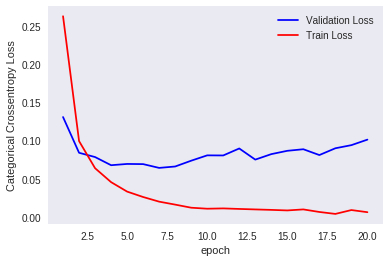

In [18]:
score = model_relu.evaluate(X_test,Y_test,verbose=0)
print('Test Score: ', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x,vy,ty,ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


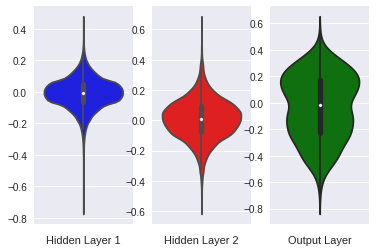

In [19]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title('Weight matrices after model is trained')
plt.subplot(1,3,1)
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1,3,2)
ax = sns.violinplot(y=h2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1,3,3)
ax = sns.violinplot(y=out_w,color='g')
plt.xlabel('Output Layer')
plt.show()

**MLP + RELU (2 LAYERS) + BN + ADAM**

In [47]:
from keras.layers.normalization import BatchNormalization

model_batch2 = Sequential()

# using He initialisation so sigma= sqrt(a/fan_in)
# sqrt(2/784) = 0.0505
# sqrt(2/450) = 0.0667

model_batch2.add(Dense(360, activation='relu', input_shape = (input_dim,), kernel_initializer = RandomNormal(mean=0.0, stddev = 0.0505, seed=None)))
model_batch2.add(BatchNormalization())
model_batch2.add(Dense(77, activation='relu', input_shape = (input_dim,), kernel_initializer = RandomNormal(mean=0.0, stddev = 0.0667, seed=None)))
model_batch2.add(BatchNormalization())
model_batch2.add(Dense(output_dim, activation='softmax'))

model_batch2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 360)               282600    
_________________________________________________________________
batch_normalization_13 (Batc (None, 360)               1440      
_________________________________________________________________
dense_36 (Dense)             (None, 77)                27797     
_________________________________________________________________
batch_normalization_14 (Batc (None, 77)                308       
_________________________________________________________________
dense_37 (Dense)             (None, 10)                780       
Total params: 312,925
Trainable params: 312,051
Non-trainable params: 874
_________________________________________________________________


In [48]:
model_batch2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch2.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.2147 - acc: 0.9376 - val_loss: 0.1120 - val_acc: 0.9655
Epoch 2/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0795 - acc: 0.9767 - val_loss: 0.0919 - val_acc: 0.9718
Epoch 3/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0518 - acc: 0.9844 - val_loss: 0.0962 - val_acc: 0.9699
Epoch 4/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0370 - acc: 0.9884 - val_loss: 0.0920 - val_acc: 0.9719
Epoch 5/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0287 - acc: 0.9908 - val_loss: 0.0791 - val_acc: 0.9757
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0244 - acc: 0.9920 - val_loss: 0.0792 - val_acc: 0.9759
Epoch 7/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0204 - acc: 0.9935 - val_loss: 0.0832 - 

Test score: 0.09037947372128129
Test Accuracy: 0.9795


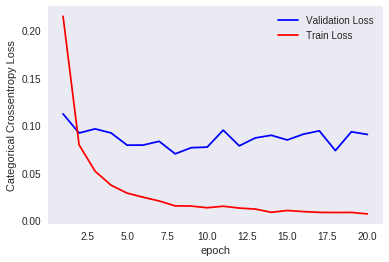

In [49]:
score = model_batch2.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test Accuracy:', score[1])

fig,ax= plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x,vy,ty,ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


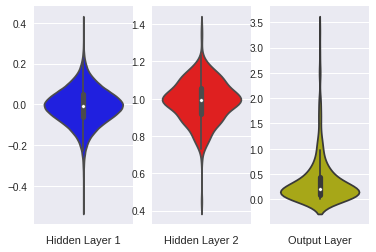

In [50]:
w_after = model_batch2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title('Weights are training with 3 hidden layers')
plt.subplot(1,3,1)
ax = sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1,3,2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1,3,3)
ax = sns.violinplot(y=out_w, color='y')
plt.xlabel('Output Layer')
plt.show()



**MLP + RELU (2 LAYERS) + BN + DROPOUT + ADAM**



In [51]:
from keras.layers import Dropout

model_drop2 = Sequential()

model_drop2.add(Dense(360, activation='relu', input_dim=input_dim, kernel_initializer=RandomNormal(mean=0.0, stddev = 0.0505, seed=None)))
model_drop2.add(BatchNormalization())
model_drop2.add(Dropout(0.5))

model_drop2.add(Dense(77, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev = 0.0667, seed=None)))
model_drop2.add(BatchNormalization())
model_drop2.add(Dropout(0.5))

model_drop2.add(Dense(output_dim, activation='softmax'))

model_drop2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 360)               282600    
_________________________________________________________________
batch_normalization_15 (Batc (None, 360)               1440      
_________________________________________________________________
dropout_6 (Dropout)          (None, 360)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 77)                27797     
_________________________________________________________________
batch_normalization_16 (Batc (None, 77)                308       
_________________________________________________________________
dropout_7 (Dropout)          (None, 77)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                780       
Total para

In [52]:
model_drop2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop2.fit(X_train,Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.4992 - acc: 0.8499 - val_loss: 0.1631 - val_acc: 0.9498
Epoch 2/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.2454 - acc: 0.9278 - val_loss: 0.1221 - val_acc: 0.9620
Epoch 3/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.1909 - acc: 0.9431 - val_loss: 0.1046 - val_acc: 0.9667
Epoch 4/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.1615 - acc: 0.9523 - val_loss: 0.0919 - val_acc: 0.9715
Epoch 5/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.1434 - acc: 0.9571 - val_loss: 0.0819 - val_acc: 0.9727
Epoch 6/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.1275 - acc: 0.9619 - val_loss: 0.0749 - val_acc: 0.9762
Epoch 7/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.1183 - acc: 0.9645 - val_loss: 0.0768 -

10000/10000 [==============================] - 1s 69us/step
Test Score: 0.060565698615519796
Test Accuracy: 0.9829


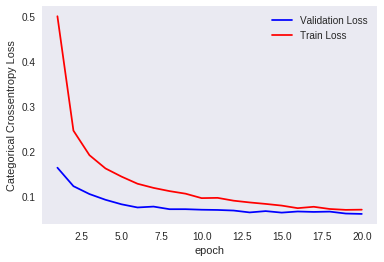

In [53]:
score = model_drop2.evaluate(X_test,Y_test,verbose=1)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x,vy,ty,ax)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


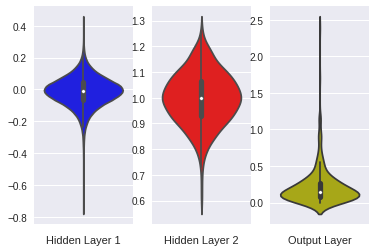

In [54]:
w_after = model_drop2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title('Weights are training with 3 hidden layers')
plt.subplot(1,3,1)
ax = sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1,3,2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1,3,3)
ax = sns.violinplot(y=out_w, color='y')
plt.xlabel('Output Layer')
plt.show()



**Comparitive conclusion for 2 layered Network:**
The accuracy in the case of 2 layered network without BN or Dropout is 97.81%, that with BN but without dropout increases to 97.95% and upon adding even dropout (with keep_prob=0.5) further increases to 98.29%. 

**MLP +  RELU (3 LAYERS) + ADAM**

In [28]:
model_3 = Sequential()
model_3.add(Dense(512, activation='relu',input_dim=input_dim))
model_3.add(Dense(256, activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(output_dim, activation='softmax'))

model_3.summary()

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(X_train,Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,Y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.2353 - acc: 0.9299 - val_loss: 0.1349 - val_acc: 0.9567
Epoch 2/20
60000/60000 [==============================] - 8s 140us/step - loss: 

Test Score: 0.09626267960083447
Test Accuracy: 0.9807


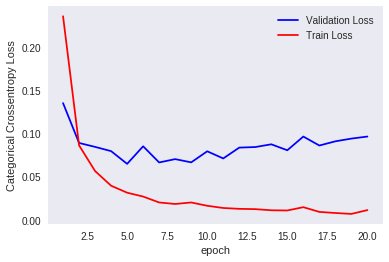

In [29]:
score = model_3.evaluate(X_test, Y_test,verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x,vy,ty,ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


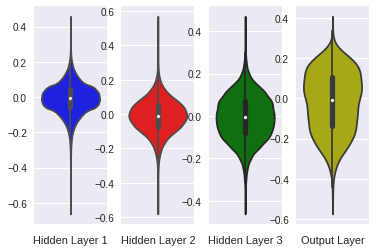

In [30]:
w_after = model_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
plt.title('Weights are training with 3 hidden layers')
plt.subplot(1,4,1)
ax = sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1,4,2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1,4,3)
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3')

plt.subplot(1,4,4)
ax = sns.violinplot(y=out_w, color='y')
plt.xlabel('Output Layer')
plt.show()


In [31]:
from keras.layers.normalization import BatchNormalization

model_batch3 = Sequential()

# using He initialisation so sigma= sqrt(a/fan_in)
# sqrt(2/784) = 0.0505
# sqrt(2/512) = 0.0625
# sqrt(2/256) = 0.0884

model_batch3.add(Dense(512, activation='relu', input_shape = (input_dim,), kernel_initializer = RandomNormal(mean=0.0, stddev = 0.0505, seed=None)))
model_batch3.add(Dense(256, activation='relu', kernel_initializer = RandomNormal(mean=0.0, stddev = 0.0625, seed=None)))
model_batch3.add(BatchNormalization())
model_batch3.add(Dense(128, activation='relu', kernel_initializer = RandomNormal(mean=0.0, stddev = 0.0884, seed=None)))
model_batch3.add(BatchNormalization())
model_batch3.add(Dense(output_dim, activation='softmax'))

model_batch3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 568,970
Trainable params: 568,202
Non-trainable params: 768
_________________________________________________________________


In [32]:
model_batch3.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch3.fit(X_train,Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.1978 - acc: 0.9401 - val_loss: 0.1072 - val_acc: 0.9657
Epoch 2/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0805 - acc: 0.9754 - val_loss: 0.1034 - val_acc: 0.9668
Epoch 3/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0549 - acc: 0.9828 - val_loss: 0.0994 - val_acc: 0.9697
Epoch 4/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.0409 - acc: 0.9864 - val_loss: 0.0865 - val_acc: 0.9724
Epoch 5/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0281 - acc: 0.9908 - val_loss: 0.0748 - val_acc: 0.9779
Epoch 6/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0253 - acc: 0.9916 - val_loss: 0.0775 - val_acc: 0.9780
Epoch 7/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0238 - acc: 0.9920 - val_loss: 0.0799 

Test Score: 0.07083540226023634
Test Accuracy: 0.9832


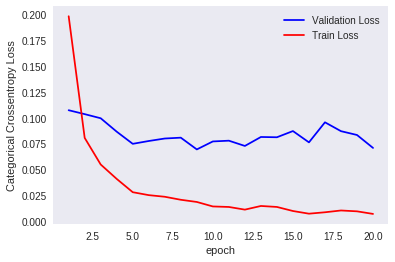

In [33]:
score = model_batch3.evaluate(X_test,Y_test,verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x,vy,ty,ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


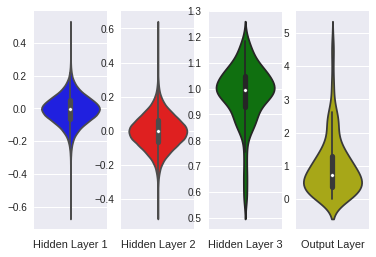

In [34]:
w_after = model_batch3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
plt.title('Weights are training with 3 hidden layers')
plt.subplot(1,4,1)
ax = sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1,4,2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1,4,3)
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3')

plt.subplot(1,4,4)
ax = sns.violinplot(y=out_w, color='y')
plt.xlabel('Output Layer')
plt.show()



**MLP + RELU (3 LAYERS) + BN + DROPOUT + ADAM}**

In [35]:
from keras.layers.normalization import BatchNormalization

model_drop3 = Sequential()

# using He initialisation so sigma= sqrt(a/fan_in)
# sqrt(2/784) = 0.0505
# sqrt(2/512) = 0.0625
# sqrt(2/256) = 0.0884

model_drop3.add(Dense(512, activation='relu', input_shape = (input_dim,), kernel_initializer = RandomNormal(mean=0.0, stddev = 0.0505, seed=None)))
model_drop3.add(Dropout(0.5))

model_drop3.add(Dense(256, activation='relu', kernel_initializer = RandomNormal(mean=0.0, stddev = 0.0625, seed=None)))
model_drop3.add(BatchNormalization())
model_drop3.add(Dropout(0.5))

model_drop3.add(Dense(128, activation='relu', kernel_initializer = RandomNormal(mean=0.0, stddev = 0.0884, seed=None)))
model_drop3.add(BatchNormalization())
model_drop3.add(Dropout(0.5))

model_drop3.add(Dense(output_dim, activation='softmax'))

model_drop3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)               512       
__________

In [36]:
model_drop3.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop3.fit(X_train,Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.6560 - acc: 0.7998 - val_loss: 0.1739 - val_acc: 0.9459
Epoch 2/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.2571 - acc: 0.9244 - val_loss: 0.1318 - val_acc: 0.9608
Epoch 3/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.1943 - acc: 0.9436 - val_loss: 0.1012 - val_acc: 0.9695
Epoch 4/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.1631 - acc: 0.9531 - val_loss: 0.0862 - val_acc: 0.9727
Epoch 5/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.1420 - acc: 0.9578 - val_loss: 0.0801 - val_acc: 0.9767
Epoch 6/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.1267 - acc: 0.9626 - val_loss: 0.0755 - val_acc: 0.9788
Epoch 7/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.1139 - acc: 0.9666 - val_loss: 0.

Test Score: 0.06139752547467942
Test Accuracy: 0.9833


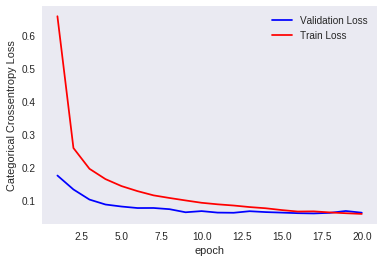

In [37]:
score = model_drop3.evaluate(X_test,Y_test,verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x,vy,ty,ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


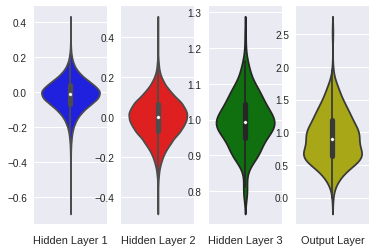

In [38]:
w_after = model_drop3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
plt.title('Weights are training with 3 hidden layers')
plt.subplot(1,4,1)
ax = sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1,4,2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1,4,3)
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3')

plt.subplot(1,4,4)
ax = sns.violinplot(y=out_w, color='y')
plt.xlabel('Output Layer')
plt.show()

**Comparative conclusion for 3 layered network:**
The accuracy of 3 layered network without BN or dropout is 98.07%, upon adding BN increases to 98.32%, and upon adding dropout (with keep_prob=0.5) layer increases by 0.01% to 98.33%.

**MLP + RELU (5 LAYERS) + ADAM**

In [24]:
from keras.layers.normalization import BatchNormalization

model_5 = Sequential()

# using He initialisation so sigma= sqrt(a/fan_in)
# sqrt(2/550) = 0.0603
# sqrt(2/400) = 0.0707
# sqrt(2/250) = 0.0894
# sqrt(2/120) = 0.1291
# sqrt(2/57) = 0.1873
# 570 -> 0.0592
# 440 -> 0.0674
# 280 -> 0.0845
# 140 -> 0.1195
# 71 -> 0.1678
model_5.add(Dense(570, activation='relu', input_shape = (input_dim,)))
model_5.add(Dense(440, activation='relu'))
model_5.add(Dense(280, activation='relu'))
model_5.add(Dense(140, activation='relu'))
model_5.add(Dense(71, activation='relu'))
model_5.add(Dense(output_dim, activation='softmax'))

model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 570)               447450    
_________________________________________________________________
dense_15 (Dense)             (None, 440)               251240    
_________________________________________________________________
dense_16 (Dense)             (None, 280)               123480    
_________________________________________________________________
dense_17 (Dense)             (None, 140)               39340     
_________________________________________________________________
dense_18 (Dense)             (None, 71)                10011     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                720       
Total params: 872,241
Trainable params: 872,241
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_5.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

history = model_5.fit(X_train,Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 237us/step - loss: 0.2390 - acc: 0.9286 - val_loss: 0.1218 - val_acc: 0.9626
Epoch 2/20
60000/60000 [==============================] - 14s 228us/step - loss: 0.0903 - acc: 0.9721 - val_loss: 0.0884 - val_acc: 0.9734
Epoch 3/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.0603 - acc: 0.9803 - val_loss: 0.0853 - val_acc: 0.9748
Epoch 4/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.0466 - acc: 0.9856 - val_loss: 0.0689 - val_acc: 0.9795
Epoch 5/20
60000/60000 [==============================] - 14s 231us/step - loss: 0.0384 - acc: 0.9876 - val_loss: 0.0827 - val_acc: 0.9769
Epoch 6/20
60000/60000 [==============================] - 14s 231us/step - loss: 0.0298 - acc: 0.9903 - val_loss: 0.0847 - val_acc: 0.9749
Epoch 7/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.0300 - acc: 0.9910 - val_loss: 0.

Test Score: 0.07826344735921721
Test accuracy: 0.9841


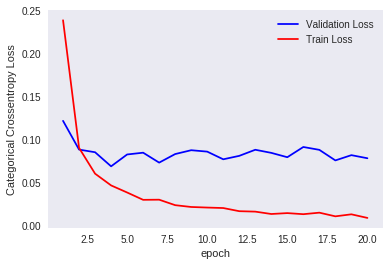

In [26]:
score = model_5.evaluate(X_test,Y_test, verbose=0)
print('Test Score:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x,vy,ty,ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


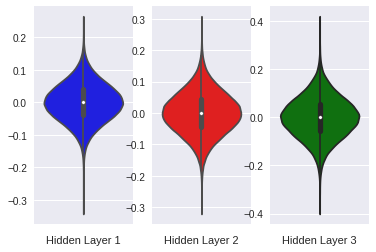

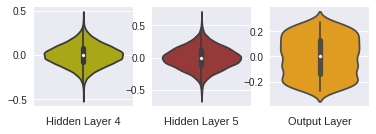

In [21]:
w_after = model_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure()
plt.title('Weights are training with 3 hidden layers')
plt.subplot(1,3,1)
ax = sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1,3,2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1,3,3)
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3')
plt.show()

plt.subplot(2,3,1)
ax = sns.violinplot(y=h4_w, color='y')
plt.xlabel('Hidden Layer 4')

plt.subplot(2,3,2)
ax = sns.violinplot(y=h5_w, color='brown')
plt.xlabel('Hidden Layer 5')


plt.subplot(2,3,3)
ax = sns.violinplot(y=out_w, color='orange')
plt.xlabel('Output Layer')
plt.show()


**MLP + RELU (5 LAYERS)+ BN + ADAM**

In [27]:
from keras.layers.normalization import BatchNormalization

model_batch5 = Sequential()

# using He initialisation so sigma= sqrt(a/fan_in)
# sqrt(2/550) = 0.0603
# sqrt(2/400) = 0.0707
# sqrt(2/250) = 0.0894
# sqrt(2/120) = 0.1291
# sqrt(2/57) = 0.1873

model_batch5.add(Dense(570, activation='relu', input_shape = (input_dim,), kernel_initializer = RandomNormal(mean=0.0, stddev = 0.0592, seed=None)))
model_batch5.add(Dense(440, activation='relu', kernel_initializer = RandomNormal(mean=0.0, stddev = 0.0674, seed=None)))
#model_batch5.add(BatchNormalization())
model_batch5.add(Dense(280, activation='relu', kernel_initializer = RandomNormal(mean=0.0, stddev = 0.0845, seed=None)))
#model_batch5.add(BatchNormalization())
model_batch5.add(Dense(140, activation='relu', kernel_initializer = RandomNormal(mean=0.0, stddev = 0.1195, seed=None)))
#model_batch5.add(BatchNormalization())
model_batch5.add(Dense(71, activation='relu', kernel_initializer = RandomNormal(mean=0.0, stddev = 0.1678, seed=None)))
#model_batch5.add(BatchNormalization())
model_batch5.add(Dense(output_dim, activation='softmax'))

model_batch5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 570)               447450    
_________________________________________________________________
dense_21 (Dense)             (None, 440)               251240    
_________________________________________________________________
dense_22 (Dense)             (None, 280)               123480    
_________________________________________________________________
dense_23 (Dense)             (None, 140)               39340     
_________________________________________________________________
dense_24 (Dense)             (None, 71)                10011     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                720       
Total params: 872,241
Trainable params: 872,241
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_batch5.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch5.fit(X_train,Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.2303 - acc: 0.9308 - val_loss: 0.1285 - val_acc: 0.9584
Epoch 2/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.0912 - acc: 0.9718 - val_loss: 0.1011 - val_acc: 0.9676
Epoch 3/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.0600 - acc: 0.9811 - val_loss: 0.0752 - val_acc: 0.9779
Epoch 4/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.0484 - acc: 0.9847 - val_loss: 0.0775 - val_acc: 0.9762
Epoch 5/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.0365 - acc: 0.9882 - val_loss: 0.0811 - val_acc: 0.9780
Epoch 6/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.0322 - acc: 0.9902 - val_loss: 0.0935 - val_acc: 0.9779
Epoch 7/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.0318 - acc: 0.9902 - val_loss: 0.

Test Score: 0.11189325285143277
Test accuracy: 0.9782


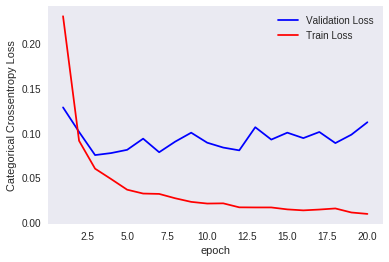

In [29]:
score = model_batch5.evaluate(X_test,Y_test, verbose=0)
print('Test Score:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x,vy,ty,ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


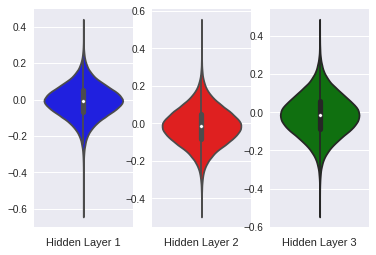

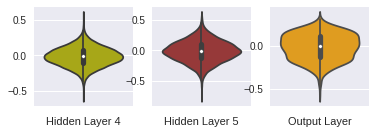

In [30]:
w_after = model_batch5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure()
plt.title('Weights are training with 3 hidden layers')
plt.subplot(1,3,1)
ax = sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1,3,2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1,3,3)
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3')
plt.show()

plt.subplot(2,3,1)
ax = sns.violinplot(y=h4_w, color='y')
plt.xlabel('Hidden Layer 4')

plt.subplot(2,3,2)
ax = sns.violinplot(y=h5_w, color='brown')
plt.xlabel('Hidden Layer 5')


plt.subplot(2,3,3)
ax = sns.violinplot(y=out_w, color='orange')
plt.xlabel('Output Layer')
plt.show()



**MLP + RELU (5 LAYERS) + BN + DROPOUT + ADAM**

In [34]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_drop5 = Sequential()

# using He initialisation so sigma= sqrt(a/fan_in)
# sqrt(2/550) = 0.0603
# sqrt(2/400) = 0.0707
# sqrt(2/250) = 0.0894
# sqrt(2/120) = 0.1291
# sqrt(2/57) = 0.1873

model_drop5.add(Dense(570, activation='relu', input_shape = (input_dim,), kernel_initializer = RandomNormal(mean=0.0, stddev = 0.0592, seed=None)))
model_drop5.add(Dense(440, activation='relu', kernel_initializer = RandomNormal(mean=0.0, stddev = 0.0674, seed=None)))
model_drop5.add(BatchNormalization())
model_drop5.add(Dropout(0.5))

model_drop5.add(Dense(280, activation='relu', kernel_initializer = RandomNormal(mean=0.0, stddev = 0.0845, seed=None)))
model_drop5.add(BatchNormalization())
model_drop5.add(Dropout(0.5))

model_drop5.add(Dense(140, activation='relu', kernel_initializer = RandomNormal(mean=0.0, stddev = 0.1195, seed=None)))
model_drop5.add(BatchNormalization())
model_drop5.add(Dropout(0.5))

model_drop5.add(Dense(71, activation='relu', kernel_initializer = RandomNormal(mean=0.0, stddev = 0.1678, seed=None)))
model_drop5.add(BatchNormalization())
model_drop5.add(Dropout(0.5))

model_drop5.add(Dense(output_dim, activation='softmax'))

model_drop5.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 570)               447450    
_________________________________________________________________
dense_29 (Dense)             (None, 440)               251240    
_________________________________________________________________
batch_normalization_6 (Batch (None, 440)               1760      
_________________________________________________________________
dropout_1 (Dropout)          (None, 440)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 280)               123480    
_________________________________________________________________
batch_normalization_7 (Batch (None, 280)               1120      
___________________________

In [35]:
model_drop5.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop5.fit(X_train,Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 317us/step - loss: 0.9394 - acc: 0.7117 - val_loss: 0.2037 - val_acc: 0.9387
Epoch 2/20
60000/60000 [==============================] - 17s 277us/step - loss: 0.2964 - acc: 0.9202 - val_loss: 0.1384 - val_acc: 0.9605
Epoch 3/20
60000/60000 [==============================] - 17s 290us/step - loss: 0.1957 - acc: 0.9480 - val_loss: 0.1223 - val_acc: 0.9657
Epoch 4/20
60000/60000 [==============================] - 17s 276us/step - loss: 0.1509 - acc: 0.9605 - val_loss: 0.1044 - val_acc: 0.9717
Epoch 5/20
60000/60000 [==============================] - 17s 283us/step - loss: 0.1192 - acc: 0.9688 - val_loss: 0.0989 - val_acc: 0.9741
Epoch 6/20
60000/60000 [==============================] - 17s 276us/step - loss: 0.1001 - acc: 0.9740 - val_loss: 0.0840 - val_acc: 0.9767
Epoch 7/20
60000/60000 [==============================] - 17s 279us/step - loss: 0.0864 - acc: 0.9778 - val_loss: 0.

Test Score: 0.09025111355305417
Test accuracy: 0.9821


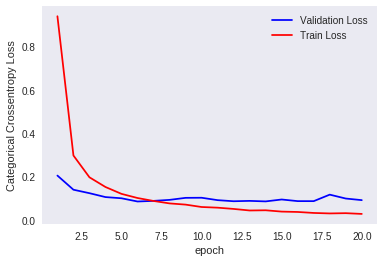

In [36]:
score = model_drop5.evaluate(X_test,Y_test, verbose=0)
print('Test Score:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x,vy,ty,ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


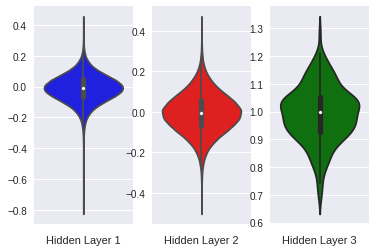

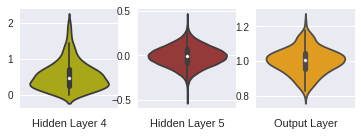

In [64]:
w_after = model_drop5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure()
plt.title('Weights are training with 3 hidden layers')
plt.subplot(1,3,1)
ax = sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1,3,2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1,3,3)
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3')
plt.show()

plt.subplot(2,3,1)
ax = sns.violinplot(y=h4_w, color='y')
plt.xlabel('Hidden Layer 4')

plt.subplot(2,3,2)
ax = sns.violinplot(y=h5_w, color='brown')
plt.xlabel('Hidden Layer 5')


plt.subplot(2,3,3)
ax = sns.violinplot(y=out_w, color='orange')
plt.xlabel('Output Layer')
plt.show()

**Comparative conclusion for 5 layered network:**
The accuracy of the 5 layered network without BN and Dropout is 98.41%, with BN is 97.82% and with droput (with keep_prob 0.5) is 98.21%

**CONCLUSION:**
The final accuracy after performing BN and dropout has been very similar for all three structures. However, the inital accuracy, one without BN or dropout increased with increase in the number of layers. Consequently, the time required to train the network also increased by a little. Hence, having applied both BN and Dropout, we could go with lesser number of layers as the complexity is lesser and the result similar.